# Industrial fan vibrations forecast

In [ ]:
# In the following, I intend to first look deep into the sensor data, the recorded vibration voltage of an industrial fan. 
# Second I will go on with different approaches to model the data and forecast the vibrations (consequently the status
# of the machine) in future.

In [2]:
# Importing required libraries:
import numpy as np
import seaborn as sns
import pandas as pd 

In [3]:
# Loading the data:
fan = pd.read_csv("E:\Github\project_fan.csv", error_bad_lines=False, sep='[;,]', header=None, engine = 'python')

Skipping line 849: Expected 16388 fields in line 849, saw 16543. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 881: Expected 16388 fields in line 881, saw 16537. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.


In [4]:
# I will check different properties of the data first:
type(fan)

pandas.core.frame.DataFrame

In [5]:
fan.size

14716424

In [6]:
fan.shape

(898, 16388)

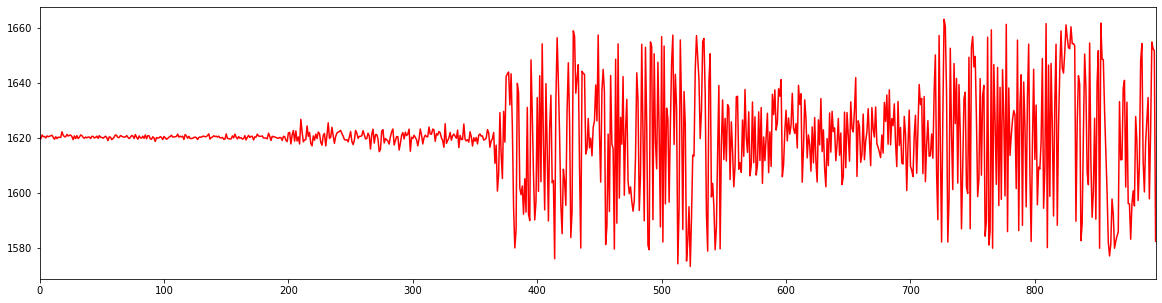

In [7]:
# I take a look at a row, as a vibration signal sample, visually: 
%matplotlib inline
fan[350].plot.line(color='red',label='Fan Vibration Sig', figsize=(20, 5))

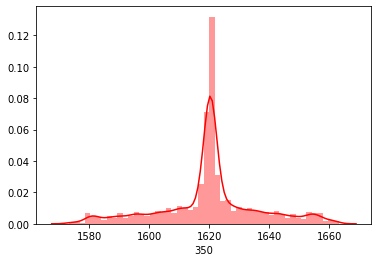

In [8]:
# Using the seaborn library, I take a look at the probability distribution of the signal, to see what kind of model would
# be appropriate for this kind of data:
sns.distplot(fan[350],bins=50, kde = True, color='red')

In [9]:
# To drop the first columns of the data I proceed:
fan.drop([0,1,2,3,4,16387],axis=1, inplace=True)
fan.head()

,5,6,7,8,9,10,11,12,13,14,...,16377,16378,16379,16380,16381,16382,16383,16384,16385,16386
0,1619.082642,1620.089722,1620.039368,1620.039368,1620.240784,1620.391846,1620.089722,1619.435120,1620.492554,1620.744324,...,1620.391846,1620.492554,1620.895386,1620.442200,1619.737244,1620.039368,1619.384766,1619.686890,1620.341492,1620.391846
1,1619.082642,1620.492554,1620.190430,1620.039368,1619.636536,1620.895386,1619.284058,1619.787598,1620.089722,1620.291138,...,1620.291138,1619.989014,1620.492554,1620.593262,1620.039368,1620.089722,1620.442200,1619.686890,1620.089722,1620.442200
2,1620.643616,1620.291138,1620.693970,1620.140076,1620.190430,1620.895386,1620.442200,1619.837952,1620.643616,1620.240784,...,1619.737244,1619.938660,1620.492554,1620.442200,1620.492554,1620.442200,1619.989014,1620.240784,1619.888306,1619.888306
3,1619.737244,1619.686890,1620.240784,1619.837952,1620.341492,1619.233704,1620.492554,1620.240784,1620.240784,1620.391846,...,1620.291138,1619.837952,1619.938660,1619.485474,1620.190430,1620.442200,1620.492554,1620.442200,1620.744324,1620.089722
4,1620.291138,1620.391846,1619.586182,1620.039368,1620.442200,1619.686890,1621.197510,1620.089722,1620.341492,1620.089722,...,1620.391846,1620.190430,1619.636536,1620.492554,1620.895386,1620.190430,1619.636536,1619.787598,1619.787598,1619.535828


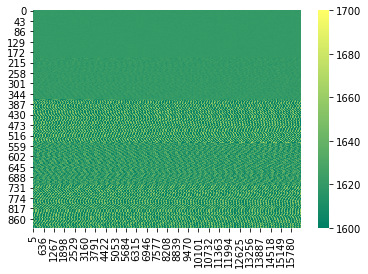

In [10]:
# Taking a look at the heatmap of the data, meaning the ~ 15000 ensembles for each epoch time window:
sns.heatmap(fan, vmin=1600, vmax=1700, cmap='summer')

(array([1.74777049e+07, 9.32172132e+06, 4.79539571e+03, 4.07780779e+03,
        3.59431559e+03, 2.96091867e+03, 2.28103887e+03, 1.67296340e+03,
        1.38067863e+03, 8.43706079e+02, 6.48907862e+02, 5.25931894e+02,
        4.78889565e+02, 2.62882366e+02, 5.03519465e+02, 2.81406638e+02,
        3.54293282e+02, 1.98475226e+02, 3.07403281e+02, 2.39449012e+02,
        1.79052256e+02, 2.16620165e+02, 1.46613841e+02, 1.35598849e+02,
        1.16194045e+02, 9.81555484e+01, 1.32994478e+02, 5.99963443e+01,
        1.03866611e+02, 1.27505484e+02, 9.01080521e+01, 9.39158574e+01,
        1.42233392e+02, 1.86607699e+01, 1.31597631e+02, 5.11046191e+01,
        5.03830104e+01, 5.57066456e+01, 6.75209830e+01, 1.61905962e+01,
        9.60192264e+01, 8.50097067e+00, 4.90394593e+01, 6.13307597e+01,
        4.20994102e+01, 5.38120682e+01, 8.11010928e+01, 4.07303272e+00,
        1.07295620e+02, 3.71473944e+01, 2.88147433e+01, 1.20301820e+02,
        3.52138103e+01, 3.26914151e+01, 4.96093550e+01, 1.233666

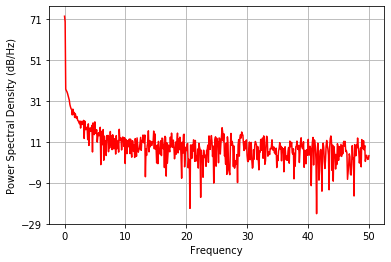

In [11]:
# Now I plot the power spectrum of the signal to find the dominent frequencies out:
import matplotlib.pyplot as plt
dt=0.01
plt.psd(fan[350],1024, 1/dt,  color='red')

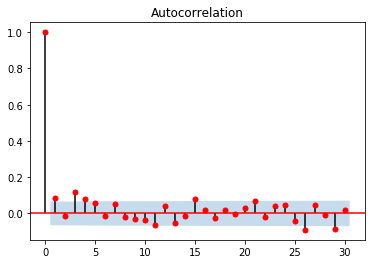

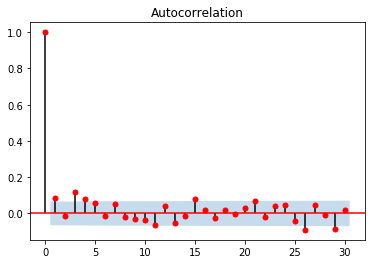

In [12]:
# Or using another approach:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(fan[350], color='red')

In [13]:
# How correlated is the vibrartion signal? Plotting the corr function, we see that the correlations die off quickly:
laggmax = 100
corFunc = np.zeros(laggmax,dtype=float)

for lagg in range(0, 100):
    corFunc[lagg] = fan[350].autocorr(lag=lagg)

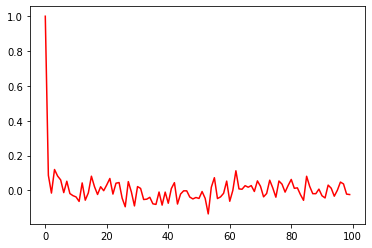

In [14]:
import matplotlib.pyplot as plt
plt.plot(corFunc, color='red')

# ARCH/GARCH model

In [16]:
# Digging into the data, I can recommend the ARCH model for this data set (autoregressive conditional heteroskedasticity
# (ARCH model for volatility shocks) 
# This model as it is clear by it's name, models volatily, meaning different variances within the signal:
from arch import arch_model

In [17]:
# As an example, applying the model on one of the samples fan[350]:
ARCHmodel = arch_model(fan[350])

In [18]:
result = ARCHmodel.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3271.24933721391
Iteration:      2,   Func. Count:     13,   Neg. LLF: 3217.4976902843555
Iteration:      3,   Func. Count:     20,   Neg. LLF: 3189.1451803627533
Iteration:      4,   Func. Count:     26,   Neg. LLF: 3016.4556712870667
Iteration:      5,   Func. Count:     37,   Neg. LLF: 2956.9091777661456
Iteration:      6,   Func. Count:     46,   Neg. LLF: 2943.8663264108127
Iteration:      7,   Func. Count:     53,   Neg. LLF: 2930.5143959314514
Iteration:      8,   Func. Count:     59,   Neg. LLF: 2902.5970731428733
Iteration:      9,   Func. Count:     65,   Neg. LLF: 2900.016371641228
Iteration:     10,   Func. Count:     71,   Neg. LLF: 2897.2734437489626
Iteration:     11,   Func. Count:     78,   Neg. LLF: 2887.581469692106
Iteration:     12,   Func. Count:     84,   Neg. LLF: 2885.5677467282285
Iteration:     13,   Func. Count:     90,   Neg. LLF: 2883.7196374582854
Iteration:     14,   Func. Count:     96,   Neg. LLF: 2

In [19]:
# By fitting the data using the Generalized ARCH model, one can see that this could be a good model to make forecast for the
# vibration status of the machine, since the estimators are robust:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                    350   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -2883.38
Distribution:                  Normal   AIC:                           5774.75
Method:            Maximum Likelihood   BIC:                           5793.95
                                        No. Observations:                  898
Date:                Mon, Oct 14 2019   Df Residuals:                      894
Time:                        11:24:06   Df Model:                            4
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu          1620.3674  4.760e-02  3.404e+04      0.000 [1.620e+03,1.620e+03]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0154  8.833e-03      1.743  8.140e-02 [-1.920e-03,3.270e-02]
alpha[1]       0.1400  2.889e-02      4.846  1.260e-06    [8.337e-02,  0.197]
beta[1]        0.8600  3.121e-02     27.552 4.135e-167      [  0.799,  0.921]
=============================================================================

Covariance estimator: robust
"""

In [20]:
# This classical Time Series Modeling is as well applied for the Pump data and then is compared to a Machine Learning Scheme,
# Random Forests for a better and more exact model.